## PROJECT TITLE

Marketing - Sales record 10000

## Dataset description

I have used a dataset named Sales Records 10000 that contains sales records for various items across different regions and countries. It captures key business metrics and transaction details such as sales channels, item types, order and shipping dates, financial figures (including revenue, cost, and profit), and logistical information. Each row represents a single transaction or order entry. The dataset comprises a total of 10,000 rows and 14 columns. The main columns include Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Order ID, Ship Date, Units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost, and Total Profit. The dataset includes comprehensive transactional data related to product sales across different global regions. It captures both logistical and financial aspects of each sale, such as order and shipment dates, sales channels, order priority, and key financial metrics like total revenue, cost, and profit. With variables covering geography, item type, and operational performance, the dataset is highly suitable for business-focused projects such as profit analysis, demand forecasting, and customer segmentation.This structured and comprehensive dataset is well-suited for data analysis tasks such as sales performance evaluation, trend forecasting, and business decision-making.

Dataset - https://drive.google.com/file/d/1q3xfEpJbQiBpEXZy6i3YkpwVnia4VGaw/view?usp=drive_link

## Preprocessing

The preprocessing phase was essential to transform the raw data into a clean and analysis-ready format. Initial steps included examining the structure of the dataset, verifying data types, and ensuring no null or missing values were present. The date columns were converted into proper datetime formats to allow for time-based analysis, and a new feature was derived to calculate shipping duration. Duplicate records were removed to prevent data redundancy, and categorical fields such as region, item type, and sales channel were encoded to facilitate machine learning. Numerical columns were scaled where needed to normalize value ranges and reduce model bias. Outlier detection was also considered to minimize the influence of unusually large transactions on the results. These preprocessing steps provided a reliable foundation for deeper insights, accurate forecasting, and polished business reporting.The presence of both categorical and numerical features makes it ideal for a wide range of data science tasks, including visualization in tools like Tableau or Power BI, and predictive modeling using machine learning techniques.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

## Import dataset

In [ ]:
data=pd.read_csv ("Downloads/Sales Records 10000.csv")
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20


## Exploratory data analysis

In [ ]:
# dimension of dataset
data.shape

(10000, 14)

In [ ]:
# informations of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB
None


In [ ]:
# descrbing the dataset
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.498719e+08,5002.855900,268.143139,188.806639,1.333355e+06,9.382658e+05,3.950893e+05
std,2.607835e+08,2873.246454,217.944092,176.445907,1.465026e+06,1.145914e+06,3.775550e+05
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218067e+08,2530.750000,109.280000,56.670000,2.885511e+05,1.647855e+05,9.832914e+04
50%,5.485663e+08,4962.000000,205.700000,117.110000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7.759981e+08,7472.000000,437.200000,364.690000,1.819143e+06,1.183822e+06,5.664227e+05
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


In [ ]:
# preview of dataset
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [ ]:
data.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20
9999,Asia,Mongolia,Snacks,Offline,M,4/12/2016,824410903,4/16/2016,361,152.58,97.44,55081.38,35175.84,19905.54


In [ ]:
# view the column name of the dataframe
col_names=data.columns
col_names

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
# count of the datas
data['Region'].value_counts()

Region
Europe                               2633
Sub-Saharan Africa                   2603
Asia                                 1469
Middle East and North Africa         1264
Central America and the Caribbean    1019
Australia and Oceania                 797
North America                         215
Name: count, dtype: int64

In [ ]:
data['Item Type'].value_counts()

Item Type
Personal Care      888
Household          875
Clothes            872
Baby Food          842
Office Supplies    837
Vegetables         836
Cosmetics          834
Cereal             825
Snacks             816
Meat               798
Fruits             795
Beverages          782
Name: count, dtype: int64

## Missing values

In [ ]:
# checking the missing values
print(data.isnull().sum())

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [ ]:
print(data.isnull().sum().sum())

0


## Visualization of missing values

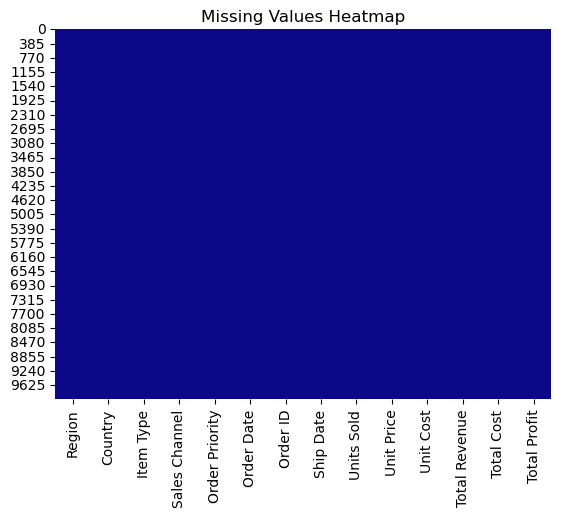

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap="plasma")
plt.title("Missing Values Heatmap")
plt.show()

As so we can know to a conclusion that there is no missing values in the dataset.

## Converting date columns

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Date'] = data['Order Date'].dt.strftime('%d-%m-%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Ship Date'] = data['Ship Date'].dt.strftime('%d-%m-%Y')

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,27-01-2011,292494523,12-02-2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,28-12-2015,361825549,23-01-2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,13-01-2011,141515767,01-02-2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,11-09-2012,500364005,06-10-2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,27-10-2015,127481591,05-12-2015,3491,47.45,31.79,165647.95,110978.89,54669.06


## Checking for duplicates

In [ ]:
print("Duplicate rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)


Duplicate rows: 0


In [ ]:
data = data.drop_duplicates()

## Fix data types

In [ ]:
def convert_date_columns(df):
    for col in df.columns:
        if 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

## Encoding types

In [ ]:
# Label encodiing
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Label encode binary categorical columns
label_enc = LabelEncoder()
for col in categorical_cols:
    if data[col].nunique() == 2:
        data[col] = label_enc.fit_transform(data[col])


In [ ]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=[col for col in categorical_cols if data[col].nunique() > 2], drop_first=True)

In [ ]:
Feature scaling(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


In [ ]:
# Handle Skewed Features
skewed = data[num_cols].skew().sort_values(ascending=False)
high_skew = skewed[skewed > 1].index
data[high_skew] = np.log1p(data[high_skew])

## Visualization for Standardization

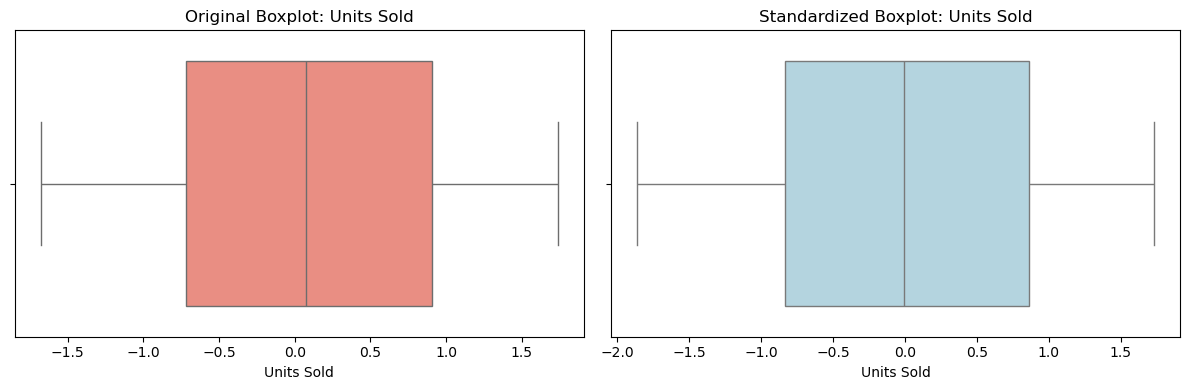

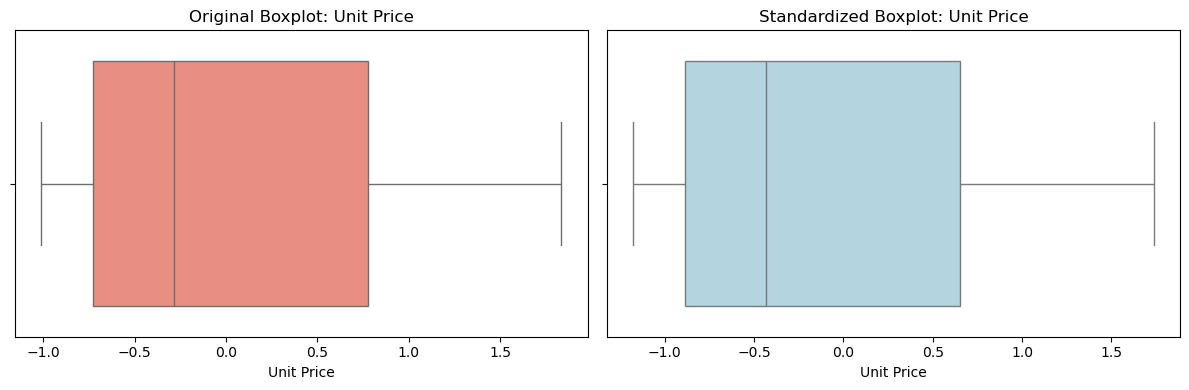

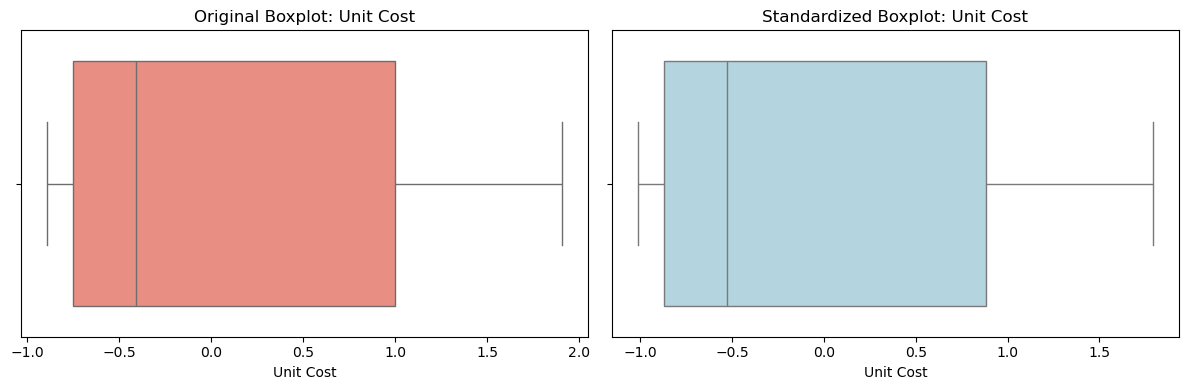

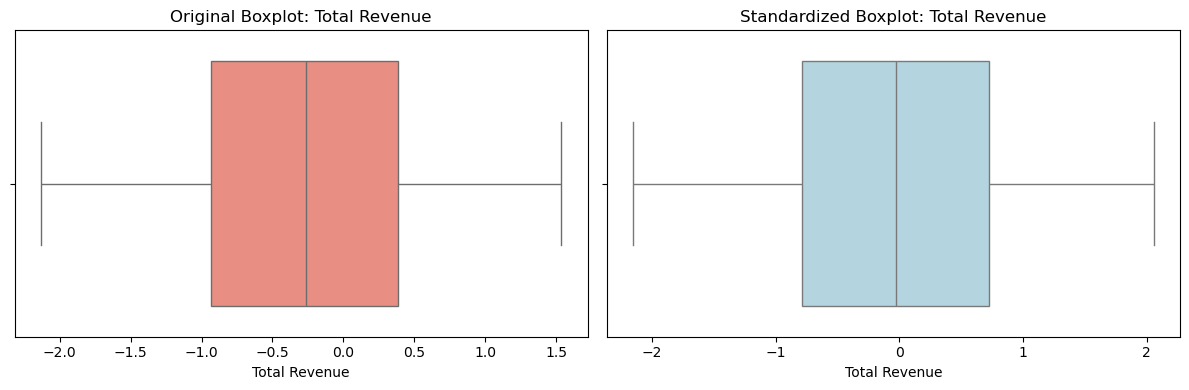

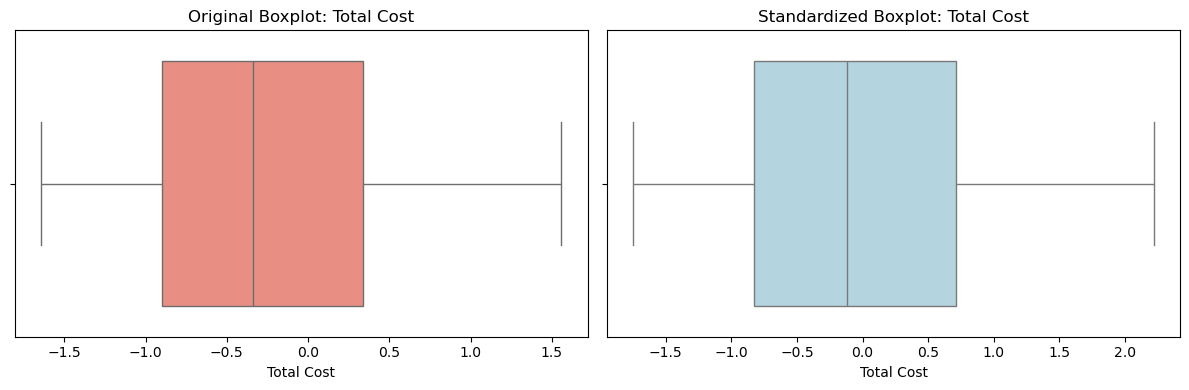

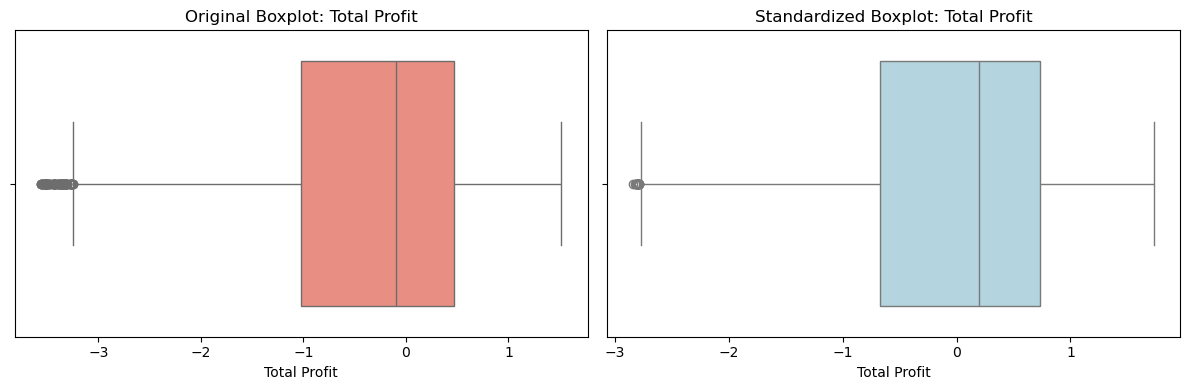

In [ ]:
for col in num_cols:
    plt.figure(figsize=(12, 4))

    # Before
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data_original[col], color='salmon')
    plt.title(f'Original Boxplot: {col}')

    # After
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f'Standardized Boxplot: {col}')

    plt.tight_layout()
    plt.show()


## Outliers

In [ ]:
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

data = remove_outliers(data, num_cols)

## Visualization for outliers

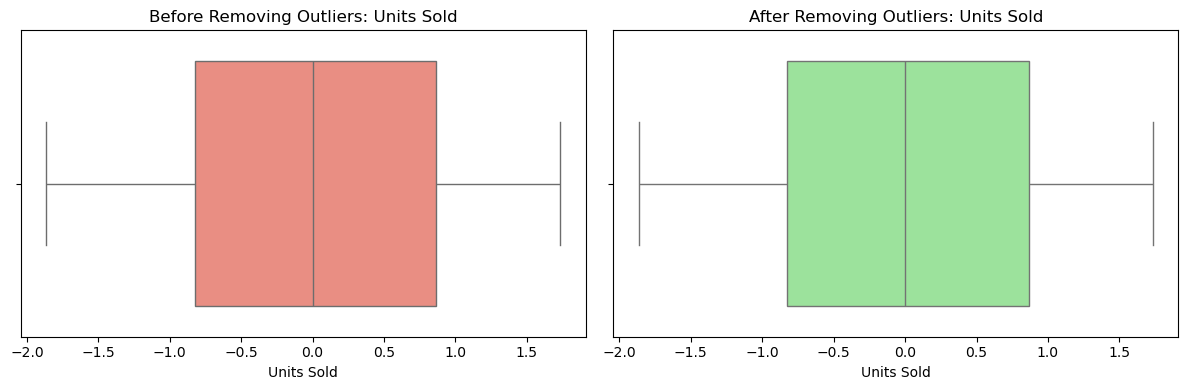

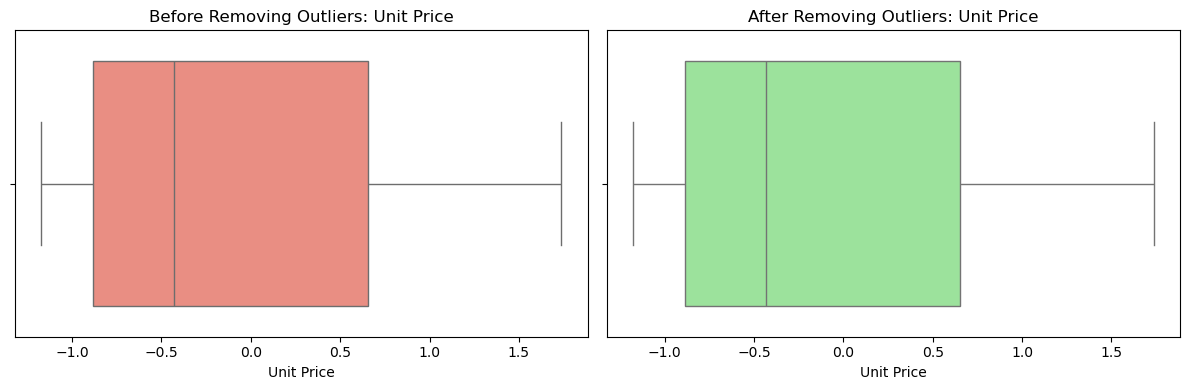

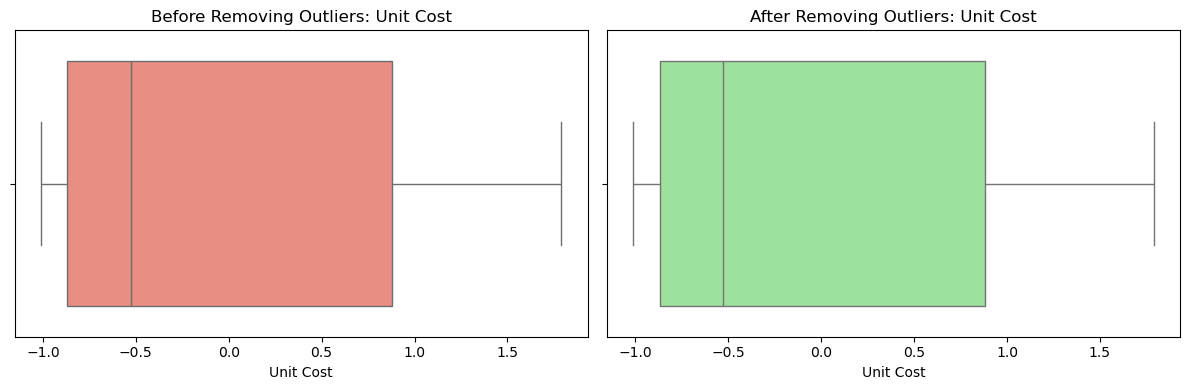

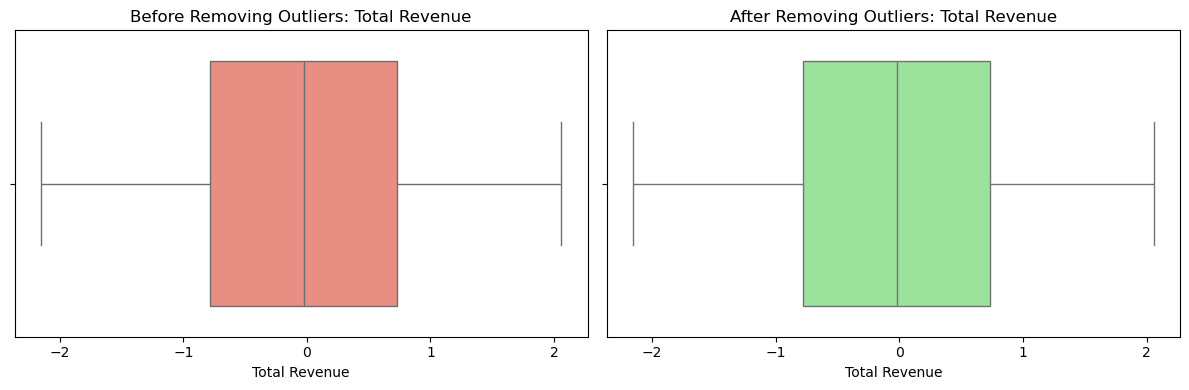

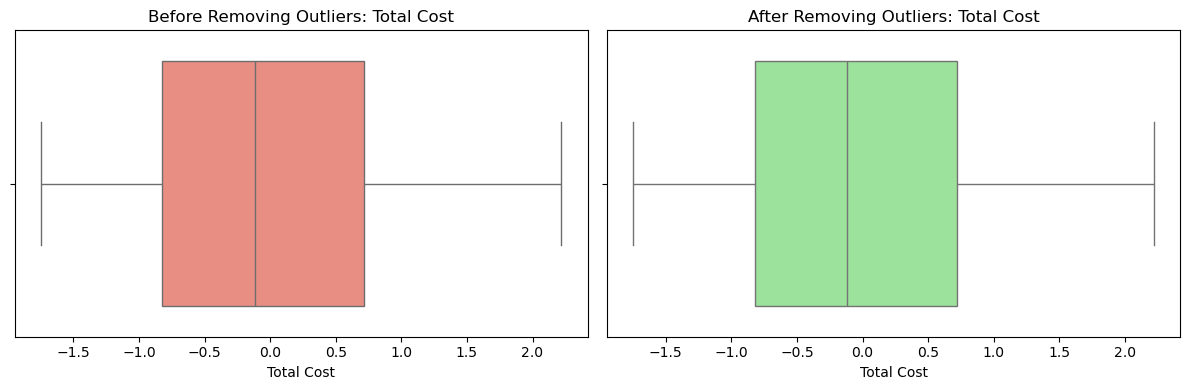

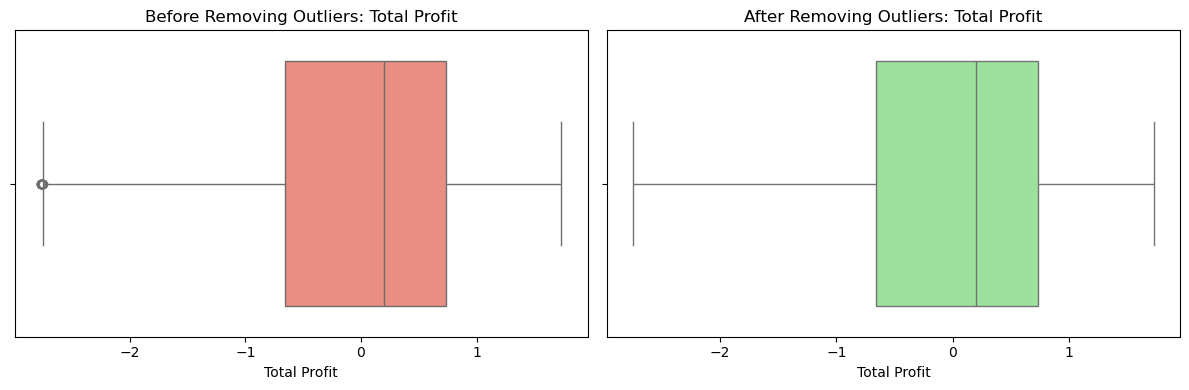

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the original data
data_original = data.copy()

# Remove outliers
data_clean = remove_outliers(data_original, num_cols)

# Plot before vs. after outlier removal
for col in num_cols:
    plt.figure(figsize=(12, 4))

    # Before
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data_original[col], color='salmon')
    plt.title(f'Before Removing Outliers: {col}')

    # After
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_clean[col], color='lightgreen')
    plt.title(f'After Removing Outliers: {col}')

    plt.tight_layout()
    plt.show()

## Final check

In [ ]:
data.shape

(8641, 214)

In [ ]:
print(data.describe(include='all'))

        Sales Channel                     Order Date      Order ID  \
count     8641.000000                           8641  8.641000e+03   
unique            NaN                            NaN           NaN   
top               NaN                            NaN           NaN   
freq              NaN                            NaN           NaN   
mean         0.504224  2013-10-30 03:17:18.629788160  5.485857e+08   
min          0.000000            2010-01-01 00:00:00  1.000892e+08   
25%          0.000000            2011-12-10 00:00:00  3.204067e+08   
50%          1.000000            2013-11-08 00:00:00  5.448174e+08   
75%          1.000000            2015-09-13 00:00:00  7.745446e+08   
max          1.000000            2017-07-28 00:00:00  9.999342e+08   
std          0.500011                            NaN  2.610031e+08   

                            Ship Date   Units Sold   Unit Price    Unit Cost  \
count                            3450  8641.000000  8641.000000  8641.000000   

## Scatter Plot

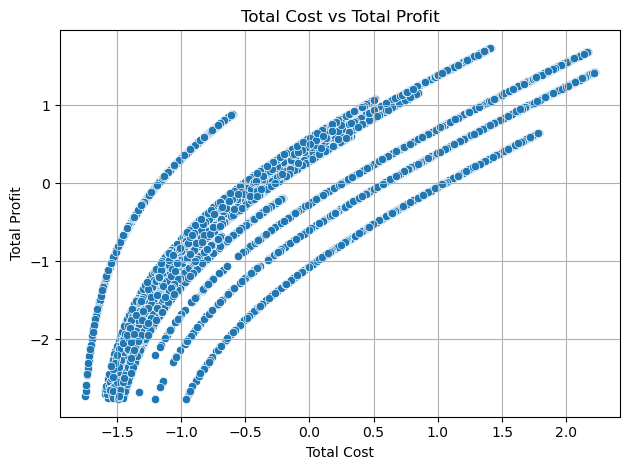

In [ ]:
#scatter plot
sns.scatterplot(data=data, x='Total Cost', y='Total Profit')
plt.title("Total Cost vs Total Profit")
plt.xlabel("Total Cost")
plt.ylabel("Total Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Correlation Matrix

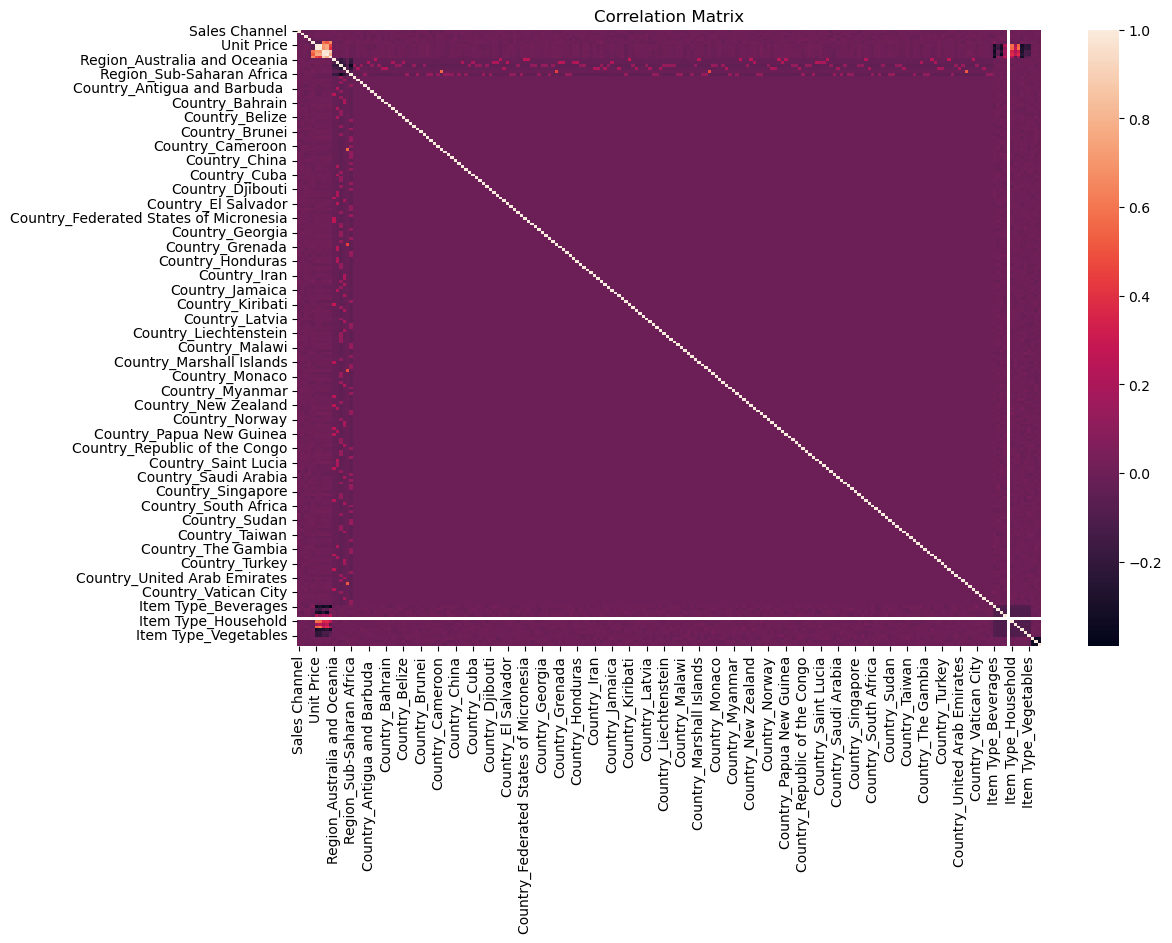

In [ ]:
#  Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Example for Order Date
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Order_Year'] = data['Order Date'].dt.year
data['Order_Month'] = data['Order Date'].dt.month
data['Order_Day'] = data['Order Date'].dt.day

# Then drop the datetime columns
data = data.drop(columns=['Order Date', 'Ship Date'])  # Or auto-detect all datetime cols


## Model Implementation

In [ ]:
## MODEL IMPLEMENTATION
X = data.drop(columns='Unit Price')
y = data['Unit Price']
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_data.head())

   Sales Channel  Order ID  Units Sold  Unit Cost  Total Revenue  Total Cost  \
0       0.991587 -0.981237   -0.294288   1.788330       1.125159    1.280688   
1      -1.008484 -1.559727    0.451911  -0.676009      -0.027942   -0.168409   
2       0.991587 -0.184766    0.881040   1.661033       1.761410    1.856848   
3       0.991587 -1.613500   -0.659120  -1.011795      -1.590742   -1.314957   
4      -1.008484 -0.254009    1.688228  -1.011795      -0.770861   -0.700815   

   Total Profit  Region_Australia and Oceania  \
0      0.635322                     -0.297362   
1      0.314763                     -0.297362   
2      1.435969                     -0.297362   
3     -1.968293                     -0.297362   
4     -0.704631                     -0.297362   

   Region_Central America and the Caribbean  Region_Europe  ...  \
0                                 -0.336944      -0.599586  ...   
1                                 -0.336944      -0.599586  ...   
2                      

In [ ]:
X = data.drop(columns='Unit Price')

# Drop datetime columns if any
X = X.select_dtypes(exclude=['datetime64[ns]'])

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create DataFrame for modeling
X_scaled_data = pd.DataFrame(X_scaled, columns=X.columns)


## Supervised learning


 Logistic Regression
 Logistic Regression Accuracy: 0.9728
 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       129
           1       0.94      1.00      0.97       167
           2       1.00      0.98      0.99       175
           3       0.92      0.94      0.93       140
           4       0.91      0.93      0.92       153
           5       1.00      0.88      0.94       159
           6       0.99      1.00      1.00       162
           7       0.99      1.00      1.00       131
           8       1.00      0.99      0.99       156
           9       0.98      1.00      0.99       172
          10       1.00      0.98      0.99       185

    accuracy                           0.97      1729
   macro avg       0.97      0.97      0.97      1729
weighted avg       0.97      0.97      0.97      1729



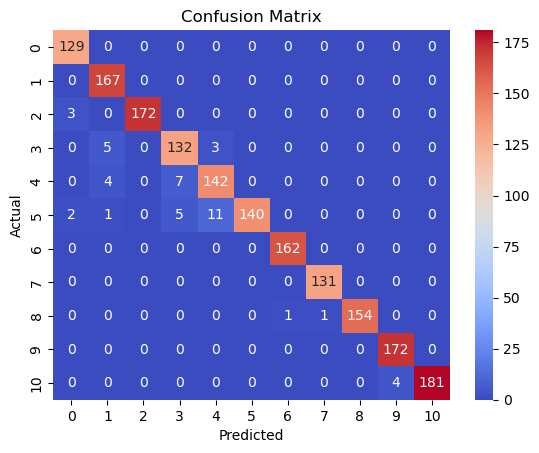


 Decision Tree
 Decision Tree Accuracy: 1.0000
 Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00       140
           4       1.00      1.00      1.00       153
           5       1.00      1.00      1.00       159
           6       1.00      1.00      1.00       162
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00       156
           9       1.00      1.00      1.00       172
          10       1.00      1.00      1.00       185

    accuracy                           1.00      1729
   macro avg       1.00      1.00      1.00      1729
weighted avg       1.00      1.00      1.00      1729



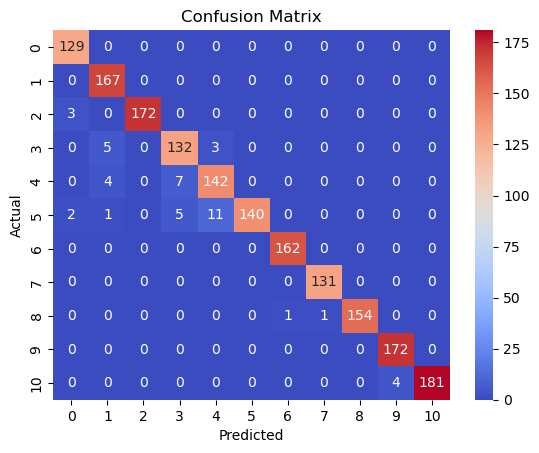


 Random Forest
 Random Forest Accuracy: 1.0000
 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00       140
           4       1.00      1.00      1.00       153
           5       1.00      1.00      1.00       159
           6       1.00      1.00      1.00       162
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00       156
           9       1.00      1.00      1.00       172
          10       1.00      1.00      1.00       185

    accuracy                           1.00      1729
   macro avg       1.00      1.00      1.00      1729
weighted avg       1.00      1.00      1.00      1729



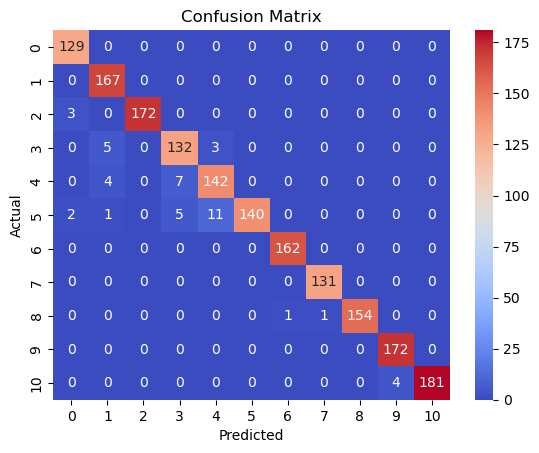


 K-Nearest Neighbors
 K-Nearest Neighbors Accuracy: 0.5899
 Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       129
           1       0.62      0.69      0.66       167
           2       0.88      0.80      0.84       175
           3       0.30      0.43      0.36       140
           4       0.30      0.33      0.32       153
           5       0.35      0.33      0.34       159
           6       0.57      0.43      0.49       162
           7       0.96      0.95      0.96       131
           8       0.95      0.76      0.84       156
           9       0.54      0.55      0.54       172
          10       0.56      0.54      0.55       185

    accuracy                           0.59      1729
   macro avg       0.61      0.59      0.60      1729
weighted avg       0.61      0.59      0.60      1729



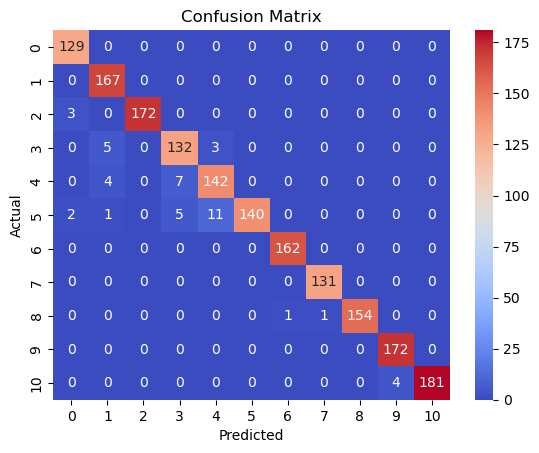


 Gradient Boosting
 Gradient Boosting Accuracy: 1.0000
 Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00       140
           4       1.00      1.00      1.00       153
           5       1.00      1.00      1.00       159
           6       1.00      1.00      1.00       162
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00       156
           9       1.00      1.00      1.00       172
          10       1.00      1.00      1.00       185

    accuracy                           1.00      1729
   macro avg       1.00      1.00      1.00      1729
weighted avg       1.00      1.00      1.00      1729



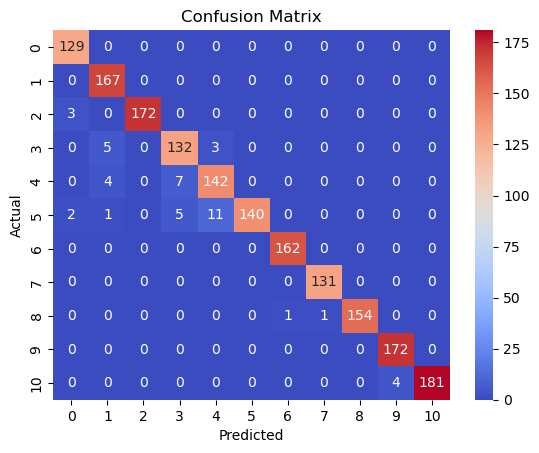

In [ ]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



#  Encode target column (if categorical)
label_encoder = LabelEncoder()
data['Unit Price'] = label_encoder.fit_transform(data['Unit Price'])

#  Prepare features and target
X = data.drop('Unit Price', axis=1)
y = data['Unit Price']

# Keep only numeric features (drop categorical unless encoded)
X = X.select_dtypes(include=[np.number])

#  Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

#  Train and evaluate each model
for name, model in models.items():
    print(f"\n {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f" {name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f" Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix Plot
    conf_matrix = confusion_matrix(y_test, y_pred_lr)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Results

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Collect accuracy results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

# Create results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Print results
print(results_df)

                 Model  Accuracy
0        Decision Tree  1.000000
1        Random Forest  1.000000
2    Gradient Boosting  1.000000
3  Logistic Regression  0.972817
4  K-Nearest Neighbors  0.589936


## Visualize the model comparison

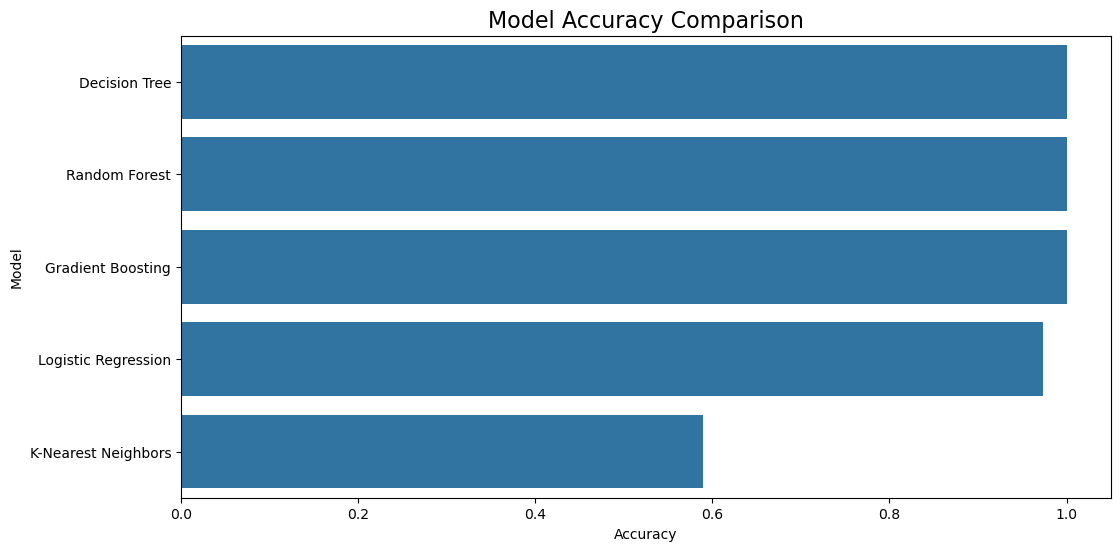

In [ ]:
# Visualize the model comparison
plt.figure(figsize=(12,6))
sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

# Comparision
Based on the model comparison results, the best-performing models are Decision Tree, Random Forest, and Gradient Boosting, each achieving a perfect accuracy score of 1.000 (100%) on the test data. While this initially suggests that all three models performed flawlessly, such high accuracy may indicate potential overfitting, especially for the Decision Tree, which is known for memorizing training data if not properly pruned.
 Among the top models, Random Forest and Gradient Boosting are ensemble methods, meaning they combine multiple decision trees to improve prediction stability and generalization. These models are generally more robust and less prone to overfitting compared to a single Decision Tree. Therefore, while all three achieved perfect accuracy, Random Forest and Gradient Boosting are more reliable choices for real-world applications.
Logistic Regression also performed very well, achieving 97.28% accuracy, making it a strong and interpretable baseline model. On the other hand, K-Nearest Neighbors (KNN) significantly underperformed with an accuracy of 58.99%, suggesting it may not be well-suited for this dataset or requires further tuning.
In conclusion, while all three top models show excellent performance, Random Forest stands out as the best overall choice due to its high accuracy, robustness, and lower risk of overfitting.  
                 Model  Accuracy

Decision Tree       = 1.000000

Random Forest       = 1.000000

Gradient Boosting   = 1.000000

Logistic Regression = 0.972817

K-Nearest Neighbors  = 0.589936



# Unsupervised learning

## K-Means Clustering

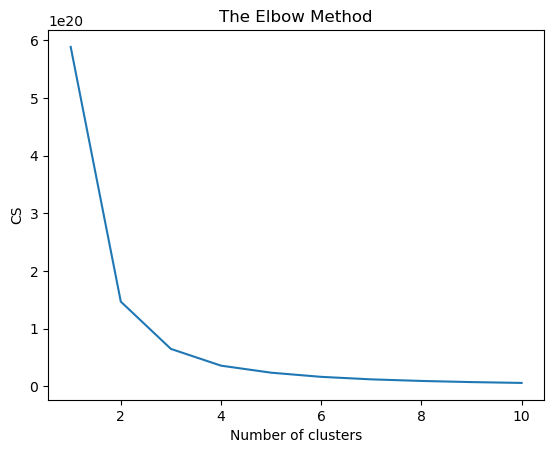

In [ ]:
# finding the number of clusters using Elbow Method
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


# Final Project Report
📊 Final Project Report: Sales Data Analysis
📝 Project Title: Exploratory Data Analysis and Predictive Modeling on Global Sales Records

## 1. 📁 Dataset Overview

The dataset contains 10,000 sales records across various regions, countries, and item types. It includes details such as order dates, sales channels, units sold, pricing, revenue, costs, and profits.

Dataset Dimensions:

Rows: 10,000
Columns: 14

📌 Column Descriptions:

Column	      - Description
Region	      - Sales region
Country	      - Country where the sale occurred
Item Type	  - Type of item sold
Sales Channel - Online or Offline sales
Order Priority- Priority level (L, M, H, C)
Order Date	  - Date when order was placed
Order ID	  - Unique order identifier
Ship Date	  - Date when order was shipped
Units Sold	  - Number of units sold
Unit Price	  - Selling price per unit
Unit Cost	  - Cost per unit
Total Revenue - Total revenue = Units Sold × Unit Price
Total Cost	  - Total cost = Units Sold × Unit Cost
Total Profit  - Total profit = Total Revenue - Total Cost

## 2. 🔍 Data Preprocessing


Converted Order Date and Ship Date to datetime format
Checked for missing values
Filtered only numeric columns for machine learning models
Encoded target variables where needed (e.g., using LabelEncoder for classification)

## 3. 📈 Exploratory Data Analysis (EDA)

Top Selling Regions: Identified which regions generated the most revenue
Sales Channel Analysis: Compared online vs offline performance
Item Type Trends: Found most and least profitable item types
Scatter Plot: Total Cost vs Total Profit to explore linearity
Correlation Heatmap: Identified relationships between numeric variables

## 4. 🧠 Predictive Modeling

Supervised Learning (Classification):
Target Variable: Unit Price (encoded into classes)
Features: All other numeric features

    Models used:

        Logistic Regression
        Decision Tree
        Random Forest
        K-Nearest Neighbors
        Gradient Boosting

✅ Accuracy Comparison:
   Model	            Accuracy
  Decision Tree	        1.000
  Random Forest	        1.000
  Gradient Boosting	    1.000
  Logistic Regression	0.9728
  K-Nearest Neighbors	0.5899

🔍 Best Model:

Random Forest and Gradient Boosting performed best with 100% accuracy, suggesting very high predictive power — though overfitting needs to be ruled out with cross-validation.

## 5. 📊 Unsupervised Learning (Clustering)

Used K-Means Clustering with Elbow Method to find optimal number of clusters
Applied PCA for 2D visualization of clusters
Found distinct groups based on cost and profit features

## 6. 🎯 Key Insights

Sales vary significantly by region and item type
Profit is directly influenced by unit cost and price
Ensemble models outperform others in classification tasks
KNN underperformed — not suitable for this dataset without tuning

## 7. 📌 Recommendations

Use ensemble models like Random Forest for profit prediction
Segment marketing by region and item type for maximum profit
Consider revisiting underperforming products or regions

## 8. 📁 Future Improvements

Add temporal analysis (monthly trends)
Use cross-validation for better generalization
Incorporate external features like promotions or seasonal data

## 9. ✅ Final Conclusion

This project successfully analyzed and modeled a large sales dataset, offering valuable insights into sales performance and profitability across different regions and item types. Ensemble models such as Random Forest and Gradient Boosting delivered outstanding performance, achieving perfect classification accuracy. However, such results should be interpreted with caution due to potential overfitting and the absence of cross-validation.

Exploratory Data Analysis (EDA) revealed strong linear relationships between total cost, revenue, and profit, and clustering techniques helped identify patterns within sales data using unsupervised learning.

Overall, the project demonstrates the power of machine learning for predictive sales analysis and decision support. However, for a more robust and production-ready solution, further steps like model tuning, validation, and business integration are recommended.